In [3]:
# wav2vec 簡體
!gdown "https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1YlwAq9fCwM06vhdsVc3QIfKUKJpDfWvt"

Downloading...
From: https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1YlwAq9fCwM06vhdsVc3QIfKUKJpDfWvt
To: /home/jovyan/project/wav2vec/wav2vec2_onnx.zip
 19%|███████▌                                | 236M/1.25G [00:02<00:08, 117MB/s]^C
Traceback (most recent call last):
  File "/opt/conda/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.7/site-packages/gdown/cli.py", line 160, in main
    resume=args.continue_,
  File "/opt/conda/lib/python3.7/site-packages/gdown/download.py", line 258, in download
    for chunk in res.iter_content(chunk_size=CHUNK_SIZE):
  File "/opt/conda/lib/python3.7/site-packages/requests/models.py", line 816, in generate
    yield from self.raw.stream(chunk_size, decode_content=True)
  File "/opt/conda/lib/python3.7/site-packages/urllib3/response.py", line 496, in stream
    data = self.read(amt=amt, decode_content=decode_content)
  File "/opt/conda/lib/python3.7/site-packages/urllib3/response.py", line 444,

In [15]:
# wav2vec 繁體
!gdown "https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1sKUGYv6IDchKDApmtLbWmj3Zbwk_uJ_U"

Downloading...
From: https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1sKUGYv6IDchKDApmtLbWmj3Zbwk_uJ_U
To: /home/jovyan/project/dist/wav2vec/ars_wav2vec2_large-xlsr-52-tw.onnx
100%|██████████████████████████████████████| 1.35G/1.35G [00:15<00:00, 89.1MB/s]


In [4]:
!pip install soundfile 

  Using cached soundfile-0.11.0-py2.py3-none-any.whl (23 kB)


In [3]:
# import onnx
import onnxruntime
import numpy as np
import soundfile as sf
from scipy.io import wavfile
import scipy.signal as sps
import os
from pythainlp.util import normalize


def _normalize(x):  #
    """You must call this before padding.
    Code from https://github.com/vasudevgupta7/gsoc-wav2vec2/blob/main/src/wav2vec2/processor.py#L101
    Fork TF to numpy
    """
    # -> (1, seqlen)
    mean = np.mean(x, axis=-1, keepdims=True)
    var = np.var(x, axis=-1, keepdims=True)
    return np.squeeze((x - mean) / np.sqrt(var + 1e-5))


def remove_adjacent(item):  # code from https://stackoverflow.com/a/3460423
    nums = list(item)
    a = nums[:1]
    for item in nums[1:]:
        if item != a[-1]:
            a.append(item)
    return "".join(a)


def asr(path):
    """
    Code from https://github.com/vasudevgupta7/gsoc-wav2vec2/blob/main/notebooks/wav2vec2_onnx.ipynb
    Fork TF to numpy
    """
    sampling_rate, data = wavfile.read(path)
    samples = round(len(data) * float(new_rate) / sampling_rate)
    new_data = sps.resample(data, samples)
    speech = np.array(new_data, dtype=np.float32)
    speech = _normalize(speech)[None]
    padding = np.zeros((speech.shape[0], AUDIO_MAXLEN - speech.shape[1]))
    speech = np.concatenate([speech, padding], axis=-1).astype(np.float32)
    ort_inputs = {"modelInput": speech}
    ort_outs = ort_session.run(None, ort_inputs)
    prediction = np.argmax(ort_outs, axis=-1)
    # Text post processing
    _t1 = "".join([res[i] for i in list(prediction[0][0])])
    return normalize("".join([remove_adjacent(j) for j in _t1.split("[PAD]")]))

with open("./data/vocab.json", "r", encoding="utf-8-sig") as f:
    d = eval(f.read())

In [5]:
input_size = 100000
new_rate = 16000
AUDIO_MAXLEN = input_size
ort_session = onnxruntime.InferenceSession('./data/ars_wav2vec2_large-xlsr-52-tw.onnx') # load onnx model
res = dict((v,k) for k,v in d.items())
res[69]="[PAD]"
res[68]="[UNK]"
FILENAME = "./data/zh/test3.wav"
print(asr(FILENAME))


麥克風測是我今天早上起床吃了一個蛋餅|


## Reference
- [wav2vec_onnx](https://drive.google.com/file/d/1YlwAq9fCwM06vhdsVc3QIfKUKJpDfWvt/view)
- [中文版](https://drive.google.com/file/d/1sKUGYv6IDchKDApmtLbWmj3Zbwk_uJ_U/view)

In [6]:
import numpy as np

def _normalize(x):  #
    """You must call this before padding.
    Code from https://github.com/vasudevgupta7/gsoc-wav2vec2/blob/main/src/wav2vec2/processor.py#L101
    Fork TF to numpy
    """
    # -> (1, seqlen)
    mean = np.mean(x, axis=-1, keepdims=True)
    var = np.var(x, axis=-1, keepdims=True)
    return np.squeeze((x - mean) / np.sqrt(var + 1e-5))

In [13]:
import onnxruntime
import soundfile as sf
from scipy.io import wavfile
import scipy.signal as sps
import os
from pythainlp.util import normalize

input_size = 100000
new_rate = 16000
AUDIO_MAXLEN = input_size
# 初始化模型
ort_session = onnxruntime.InferenceSession('./data/ars_wav2vec2_large-xlsr-52-tw.onnx') # load onnx model
# 載入字典
with open("./data/vocab.json", "r", encoding="utf-8-sig") as f:
    d = eval(f.read())
res = dict((v,k) for k,v in d.items())

sampling_rate, data = wavfile.read("./data/zh/test4.wav") # 讀取音檔
samples = round(len(data) * float(new_rate) / sampling_rate)
new_data = sps.resample(data, samples)
speech = np.array(new_data, dtype=np.float32)
speech = _normalize(speech)[None]
padding = np.zeros((speech.shape[0], AUDIO_MAXLEN - speech.shape[1]))
speech = np.concatenate([speech, padding], axis=-1).astype(np.float32)

ort_inputs = {"modelInput": speech}
ort_outs = ort_session.run(None, ort_inputs)
prediction = np.argmax(ort_outs, axis=-1)
# Text post processing
_t1 = "".join([res[i] for i in list(prediction[0][0])])
normalize("".join([remove_adjacent(j) for j in _t1.split("[PAD]")]))

'下我去百後公司買了一雙協子跟一個皮包|'

## 手動降採樣

In [14]:
new_data.shape

(77760,)

In [28]:
new_data=[]
sampling_rate, data = wavfile.read("./data/zh/test4(2ch).wav") # 讀取音檔
print(f'sampling_rate: {sampling_rate}')
for i in range(len(data)):
    if((i+1)%3==0):
        new_data.append(data[i])
new_data = np.array(new_data)
print(f'resampling_frames: {new_data.shape}')   
speech = np.array(new_data, dtype=np.float32)
speech = _normalize(speech)[None]
padding = np.zeros((speech.shape[0], AUDIO_MAXLEN - speech.shape[1]))
speech = np.concatenate([speech, padding], axis=-1).astype(np.float32)

ort_inputs = {"modelInput": speech}
ort_outs = ort_session.run(None, ort_inputs)
prediction = np.argmax(ort_outs, axis=-1)
# Text post processing
_t1 = "".join([res[i] for i in list(prediction[0][0])])
normalize("".join([remove_adjacent(j) for j in _t1.split("[PAD]")]))

sampling_rate: 48000
resampling_frames: (87722,)


'麥克風測試我今天早上起床吃了一個蛋餅|'

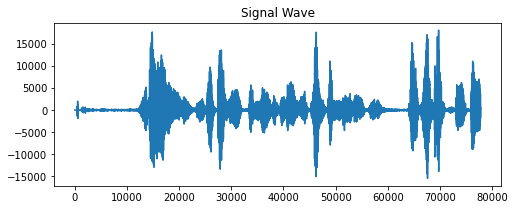

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.figure(1)
plt.title("Signal Wave")
plt.plot(data)
plt.show()

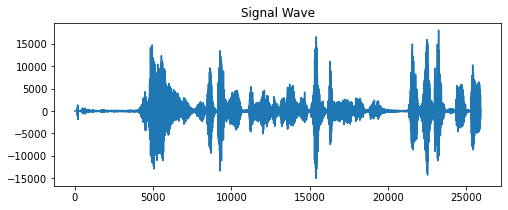

In [24]:
plt.figure(figsize=(8, 3))
plt.figure(1)
plt.title("Signal Wave")
plt.plot(new_data)
plt.show()

## 套件降採樣

In [22]:
import onnxruntime
import soundfile as sf
import librosa
import scipy.signal as sps
import os
from pythainlp.util import normalize

input_size = 100000
new_rate = 16000
AUDIO_MAXLEN = input_size
# 初始化模型
ort_session = onnxruntime.InferenceSession('./data/ars_wav2vec2_large-xlsr-52-tw.onnx') # load onnx model
# 載入字典
with open("./data/vocab.json", "r", encoding="utf-8-sig") as f:
    d = eval(f.read())
res = dict((v,k) for k,v in d.items())


speech, rate = librosa.load('./data/zh/test3.wav', sr=16000)
speech = _normalize(speech)[None]
padding = np.zeros((speech.shape[0], AUDIO_MAXLEN - speech.shape[1]))
speech = np.concatenate([speech, padding], axis=-1).astype(np.float32)

ort_inputs = {"modelInput": speech}
ort_outs = ort_session.run(None, ort_inputs)
prediction = np.argmax(ort_outs, axis=-1)
# Text post processing
_t1 = "".join([res[i] for i in list(prediction[0][0])])
normalize("".join([remove_adjacent(j) for j in _t1.split("[PAD]")]))

'麥克風測是我今天早上起床吃了一個蛋餅|'

In [17]:
speech

array([[-0.01588652, -0.03040547, -0.01538414, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

## 手刻 _normalize

In [37]:
from IPython.display import Audio

Audio("./data/zh/test3.wav")

In [43]:
sampling_rate, data = wavfile.read("./data/zh/test3.wav")
# 計算平均與變異數
_mean=0.0
_var=0.0
for i in range(len(data)):
    _mean+=data[i]
_mean/=len(data)
for i in range(len(data)):
    _var+=(data[i]-_mean)*(data[i]-_mean)
_var/=len(data)
print(_mean, _var)
# 標準化
tempArray=[]
for i in range(100000):
    if(i<samples):
        tempArray.append((data[i]-_mean)/np.sqrt(_var+1e-5));
    else:
        tempArray.append(0);
sum(abs(np.array(tempArray)))

-1.0801331615120275 3374480.0804987084


46141.04668120808

In [44]:
# 使用 numpy 標準化
def _normalize(x):
    mean = np.mean(x, axis=-1, keepdims=True)
    var = np.var(x, axis=-1, keepdims=True)
    print(mean, var)
    return np.squeeze((x - mean) / np.sqrt(var + 1e-5))
speech = _normalize(data)[None]
sum(abs(_normalize(data)))

[-1.08013316] [3374480.08049878]
[-1.08013316] [3374480.08049878]


46141.04668120763

In [34]:
sampling_rate, data = wavfile.read("./data/zh/test3.wav") # 讀取音檔
samples = round(len(data) * float(new_rate) / sampling_rate)
new_data = sps.resample(data, samples)
speech = np.array(new_data, dtype=np.float32)
speech = _normalize(speech)[None]
padding = np.zeros((speech.shape[0], AUDIO_MAXLEN - speech.shape[1]))
speech = np.concatenate([speech, padding], axis=-1).astype(np.float32)

ort_inputs = {"modelInput": speech}
ort_outs = ort_session.run(None, ort_inputs)
prediction = np.argmax(ort_outs, axis=-1)
# Text post processing
_t1 = "".join([res[i] for i in list(prediction[0][0])])
normalize("".join([remove_adjacent(j) for j in _t1.split("[PAD]")]))

'麥克風測是我今天早上起床吃了一個蛋餅|'

In [33]:
import numpy as np
np.set_printoptions(precision=6, threshold=8, edgeitems=4, linewidth=75, suppress=True, nanstr='nan', infstr='inf')